# Introduction
<hr style="border:2px solid black"> </hr>

In [ ]:
"""
What? Kernel SVMs

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook           
"""

# Import modules

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d

# Helper function

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support: ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    

# Generate synthetic dataset

In [ ]:
"""
To motivate the need for ker‐ nels, let’s look at some data that is not linearly separable.
"""

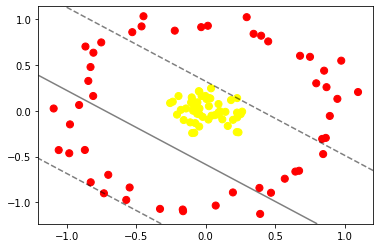

In [10]:
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
"""
It is clear that no linear discrimination will ever be able to separate this data. We could think 
about how we might project the data into a higher dimension such that a linear separator would be sufficient.
For example, one simple projection we could use would be to compute a radial basis function centered on the 
middle clump:
"""

In [11]:
r = np.exp(-(X ** 2).sum(1))

Text(0.5, 0, 'r')

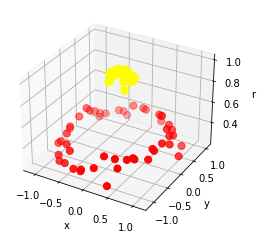

In [19]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

# The kernel trick

In [ ]:
"""
We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a 
separating plane at, say, r=0.7.

Here we had to choose and carefully tune our projection; if WE HAD NOT centered our radial basis function in 
the right location, we would not have seen such clean, linearly separable results. In general, the need to make
such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM
algorithm sift through the results. This type of basis function transformation is known as a kernel transformation,
as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting N points into N dimensions—is that it might become very 
computationally intensive as N grows large. However, because of a neat little procedure known as the kernel 
trick, a fit on kernel-transformed data can be done implicitly—that is, without ever building the full 
N-dimensional representation of the kernel projection! This kernel trick is built into the SVM, and is one 
of the reasons the method is so powerful.
"""

In [20]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

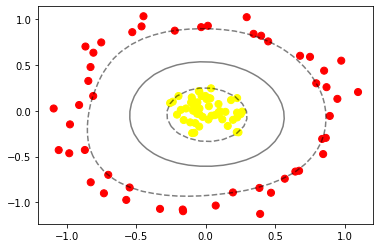

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                        s=300, lw=1, facecolors='none')